In [2]:
import cv2

def detect_faces(image, cascade):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    return image

def main():
    # Load the cascade for face detection
    face_cascade = cv2.CascadeClassifier('opencv_haarcascade_frontalface_default.xml')
    
    # Option 1: Capture video from webcam
    cap = cv2.VideoCapture(0)

    # Option 2: Use a video file as input
    # cap = cv2.VideoCapture('filename.mp4')

    # Check if the video capture is successful
    if not cap.isOpened():
        print("Error: Unable to open the video source.")
        return

    while True:
        # Read the frame
        ret, frame = cap.read()

        # Check if the frame is successfully read
        if not ret:
            print("Error: Unable to read the frame.")
            break

        # Detect and display faces
        result_frame = detect_faces(frame, face_cascade)
        cv2.imshow('Face Detection', result_frame)

        # Stop if the 'Esc' key is pressed
        key = cv2.waitKey(30)
        if key == 27:
            break

    # Release the VideoCapture object
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


Error: Unable to read the frame.


In [47]:
# OpenCV with Haar Cascade
import cv2

def detect_faces(image, cascade):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    return image

def main():
    # Load the cascade for face detection
    face_cascade = cv2.CascadeClassifier('opencv_haarcascade/haarcascade_frontalface_default.xml')
    
    # Load the image
    image = cv2.imread('imgs/prebbieGroup1.png')

    # Check if the image is successfully loaded
    if image is None:
        print("Error: Unable to open the image.")
        return

    # Detect faces and display the result
    result_image = detect_faces(image, face_cascade)
    cv2.imshow('Face Detection', result_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


In [6]:
# OpenCV with DNN
import cv2
import numpy as np

# Load the DNN Face Detector model
face_detector = cv2.dnn.readNetFromCaffe("opencv_dnn/deploy.prototxt", "opencv_dnn/res10_300x300_ssd_iter_140000_fp16.caffemodel")

# Read the input image
print("Read the input image")
image = cv2.imread("imgs/faces.jpg")

# Get the height and width of the input image
(h, w) = image.shape[:2]

# Preprocess the image by resizing it and converting it to a blob
print("Preprocessing the image")
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

# Feed the blob as input to the DNN Face Detector model
face_detector.setInput(blob)
detections = face_detector.forward()

# Loop over the detections and draw a rectangle around each face
print("Iterate over detections and create a rectangle")
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    # Filter out weak detections
    if confidence > 0.5:
        # Get the bounding box for the face
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # Draw a rectangle around the face
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)

# Show the output image
print("Show the final output")
cv2.imshow("Output", image) #To run in Google Colab, comment out this line Colab notebook
#cv2_imshow(image) #To run in Google Colab, uncomment this line
cv2.waitKey(0)
print("Completed")


Read the input image
Preprocessing the image
Iterate over detections and create a rectangle
Show the final output
Completed


In [6]:
# Dlib with CNN

import dlib
import cv2

# Load face detection model
cnn_face_detector = dlib.cnn_face_detection_model_v1("dlib_cnn/mmod_human_face_detector.dat")

# Load image
image_path = 'imgs/groupPhoto1.png'
image = cv2.imread(image_path)


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces using CNN model
faces = cnn_face_detector(gray, 1)
for faceRect in faces:
    rect =  faceRect.rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    
    # Draw rectangle around each face
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display image
cv2.imshow("Image", image)
cv2.waitKey(0)

-1

In [5]:
# Dlib with HoG and linear SVM
import dlib
import cv2

# Load the image
image_path = 'imgs/faces.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale (Dlib works with grayscale images)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

detector = dlib.get_frontal_face_detector()
faces = detector(gray)

for face in faces:
    x, y, w, h = (face.left(), face.top(), face.width(), face.height())
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    
# Save the output image
output_path = "out/hog_output.jpg"
cv2.imwrite(output_path, image)
print(f"Output image saved to {output_path}")    

# Display the image with OpenCV
cv2.imshow("Faces Detected", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Output image saved to out/hog_output.jpg


In [5]:
pip install mtcnn

     ---------------------------------------- 2.3/2.3 MB 95.4 kB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 158.7 kB/s eta 0:00:00
     ------------------------------------ 101.5/101.5 kB 970.4 kB/s eta 0:00:00
     ------------------------------------ 240.6/240.6 kB 669.7 kB/s eta 0:00:00
     ------------------------------------ 130.2/130.2 kB 856.8 kB/s eta 0:00:00
     --------------------------------------- 87.5/87.5 kB 90.0 kB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 598.8 kB/s eta 0:00:00
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
      Successfully uninstalled Pygments-2.11.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


In [12]:
import pandas
print (pandas. __version__)

1.4.4


In [2]:
pip install tensorflow

     -------------------------------------- 300.8/300.8 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 3.3 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 442.0/442.0 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 938.4/938.4 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 186.5/186.5 kB 5.7 MB/s eta 0:00:00
     -------------------------------------- 422.

In [17]:
import cv2
import mtcnn

def draw_facebox(filename, result_list):
    # load the image using OpenCV
    data = cv2.imread(filename)
    # convert from BGR to RGB
    data_rgb = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)

    # get the context for drawing boxes
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # draw rectangle
        cv2.rectangle(data_rgb, (x, y), (x+width, y+height), (0, 255, 0), 2)

    # display the image with faces
    #cv2.imshow("Detected Faces with mtcnn", cv2.cvtColor(data_rgb, cv2.COLOR_RGB2BGR))
    cv2.imshow("Detected Faces with mtcnn", data_rgb)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

filename = "imgs/footballTeam.png"  # File location
pixels = cv2.imread(filename)  # defined above, otherwise uncomment
# detector is defined above, otherwise uncomment
detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_facebox(filename, faces)


3/3 [==============================] - 0s 11ms/step


In [7]:
import matplotlib.pyplot as plt
import mtcnn
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle


def draw_facebox(filename, result_list):
  # load the image
  data = plt.imread(filename)
  # plot the image
  plt.imshow(data)
  # get the context for drawing boxes
  ax = plt.gca()
  # plot each box
  for result in result_list:
    # get coordinates
    x, y, width, height = result['box']
    # create the shape
    rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
    # draw the box
    ax.add_patch(rect)
    # show the plot
  plt.show()# filename = 'test1.jpg' # filename is defined above, otherwise uncomment
  # load image from file


filename = "imgs/prebbieGroup1.png" #File location
pixels = plt.imread(filename) # defined above, otherwise uncomment
# detector is defined above, otherwise uncomment
detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_facebox(filename, faces)

ValueError: in user code:

    File "C:\Users\23324\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\23324\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\23324\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\23324\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\23324\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\23324\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_15" is incompatible with the layer: expected shape=(None, None, None, 3), found shape=(None, 527, 225, 4)


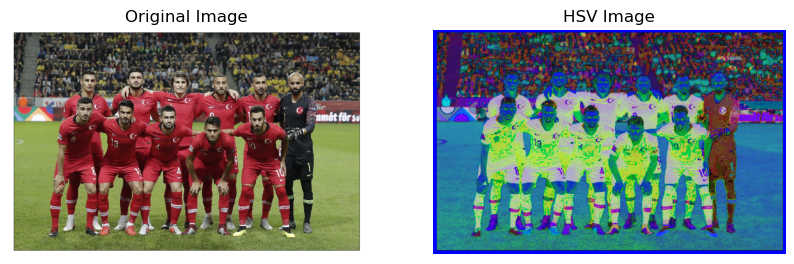

In [24]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('imgs/footballTeam.png')

# Convert to RGB for display
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Display original and RGB images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# HSV image (converted back to RGB)
plt.subplot(1, 2, 2)
plt.imshow(hsv_image)
plt.title('HSV Image')
plt.axis('off')


plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


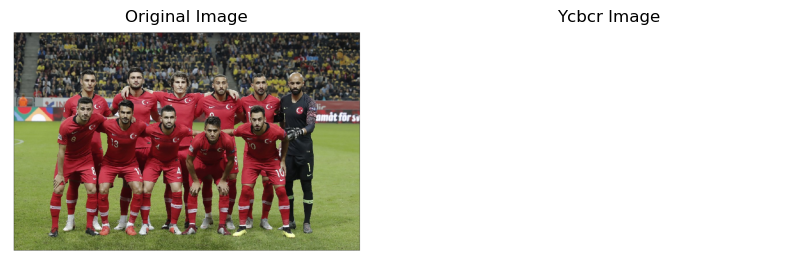

In [25]:
from skimage import io, color
import matplotlib.pyplot as plt

# Load the image
image = io.imread('imgs/footballTeam.png')
image = color.rgba2rgb(image)

# Convert to HSV
ycbcr_image = color.rgb2ycbcr(image)

# Display original and HSV images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# HSV image
plt.subplot(1, 2, 2)
plt.imshow(ycbcr_image)
plt.title('Ycbcr Image')
plt.axis('off')

plt.show()


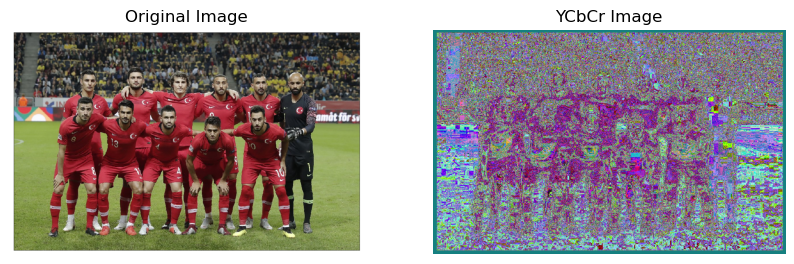

In [27]:
from skimage import io, color
import matplotlib.pyplot as plt

# Load the image
image = io.imread('imgs/footballTeam.png')
image = color.rgba2rgb(image)

# Convert to YCbCr
ycbcr_image = color.rgb2ycbcr(image)

# Normalize pixel values
image = (image * 255).astype('uint8')  # Convert back to uint8 for display
ycbcr_image = (ycbcr_image * 255).astype('uint8')  # Convert back to uint8 for display

# Display original and YCbCr images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# YCbCr image
plt.subplot(1, 2, 2)
plt.imshow(ycbcr_image)
plt.title('YCbCr Image')
plt.axis('off')

plt.show()


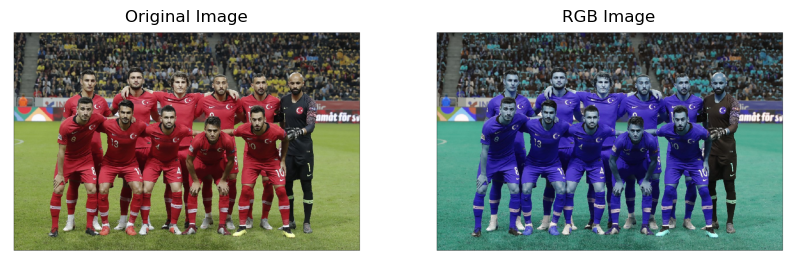

In [18]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('imgs/footballTeam.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to RGB for display
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Display original and RGB images side by side with reduced space
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# RGB image
plt.subplot(1, 2, 2)
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')


plt.show()


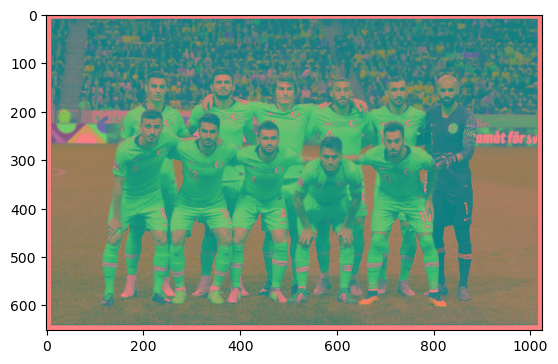

In [32]:
b

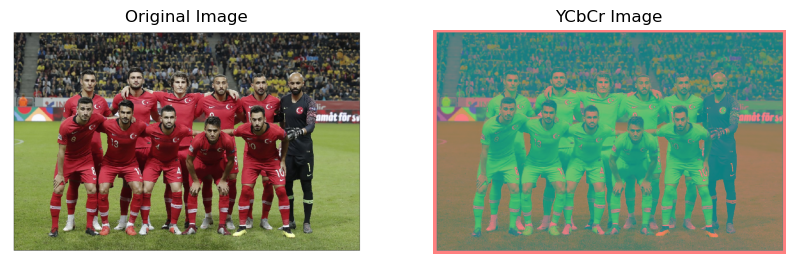

In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

fn3 = 'imgs/footballTeam.png'
img1 = cv2.imread(fn3, cv2.IMREAD_UNCHANGED)

# Convert BGR to RGB
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = np.zeros(img1.shape, np.uint8)
img2[:, :, 0] = img1[:, :, 2]
img2[:, :, 1] = img1[:, :, 1]
img2[:, :, 2] = img1[:, :, 0]

plt.figure(figsize=(10, 5))

# Create a subplot with 1 row and 3 columns
plt.subplot(1, 2, 1)
plt.imshow(img1_rgb)
plt.title('Original Image')
plt.axis('off')


transcol = cv2.cvtColor(img1, cv2.COLOR_BGR2YCrCb)

plt.subplot(1, 2, 2)
plt.imshow(transcol)
plt.title('YCbCr Image')
plt.axis('off')

plt.show()


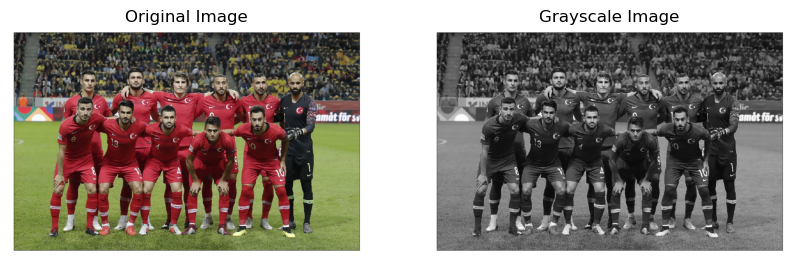

In [49]:
import cv2
from matplotlib import pyplot as plt

# Load the original image
fn3 = 'imgs/footballTeam.png'
img1 = cv2.imread(fn3, cv2.IMREAD_UNCHANGED)
# Convert BGR image to RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray_image = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Create a subplot with 1 row and 2 columns
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Original Image')
plt.axis('off')

# Display the grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()
